In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# 1.  Section

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Loading the training dataset of house price.
df = pd.read_csv('train.csv')

In [4]:
# Loading the testing dataset of house price.
df_testing = pd.read_csv('test.csv')

In [5]:
df.shape

(1460, 81)

In [6]:
df_testing.shape

(1459, 80)

In [7]:
df_testing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df = df.drop(['Id'], axis = 1)

In [9]:
# Open the file in read mode
f = open("data_description.txt", "r")

# Read the entire content of the file and print it
print(f.read())

# Close the file after reading
f.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# 2. Section

In [10]:
# first lets check for datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
def separate_columns_by_dtype(df):
    int_columns = df.select_dtypes(include=['int64']).columns.tolist()
    float_columns = df.select_dtypes(include=['float64']).columns.tolist()
    object_columns = df.select_dtypes(include=['object']).columns.tolist()

    return int_columns, float_columns, object_columns

In [12]:
int_columns, float_columns, object_columns = separate_columns_by_dtype(df)

In [13]:
def check_null(df, title):
    # Map NULL (NaN) values to 0 and non-null values to 1
    counts = pd.DataFrame({
        'NULL': df.isnull().sum(),      # Count NULLs directly
        'NON-NULL': df.notnull().sum()  # Count NON-NULLs directly
    })

    # Set a color palette
    sns.set_palette(['#ff9999', '#66b3ff'])  # Red for NULL and Blue for NON-NULL
    
    # Create the bar plot
    ax = counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette())

    # Set plot title and labels
    plt.title(f'Count of NULL and NON-NULL Entries in the Dataset of {title}',)
    plt.xlabel('Features')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.yticks(fontsize=10,)

    # Adding counters at the top of each bar
    for i in ax.containers:
        ax.bar_label(i, label_type='center', fontsize=9, color='black')

    # Set plot layout to avoid overlap
    plt.tight_layout()

    # Customize legend
    legend = plt.legend(loc='upper right')
    legend.get_texts()[0].set_text('NULL')
    legend.get_texts()[1].set_text('NON-NULL')

    # Show the plot
    plt.show()


In [14]:
# now lets explore the each features and try to remove null values 


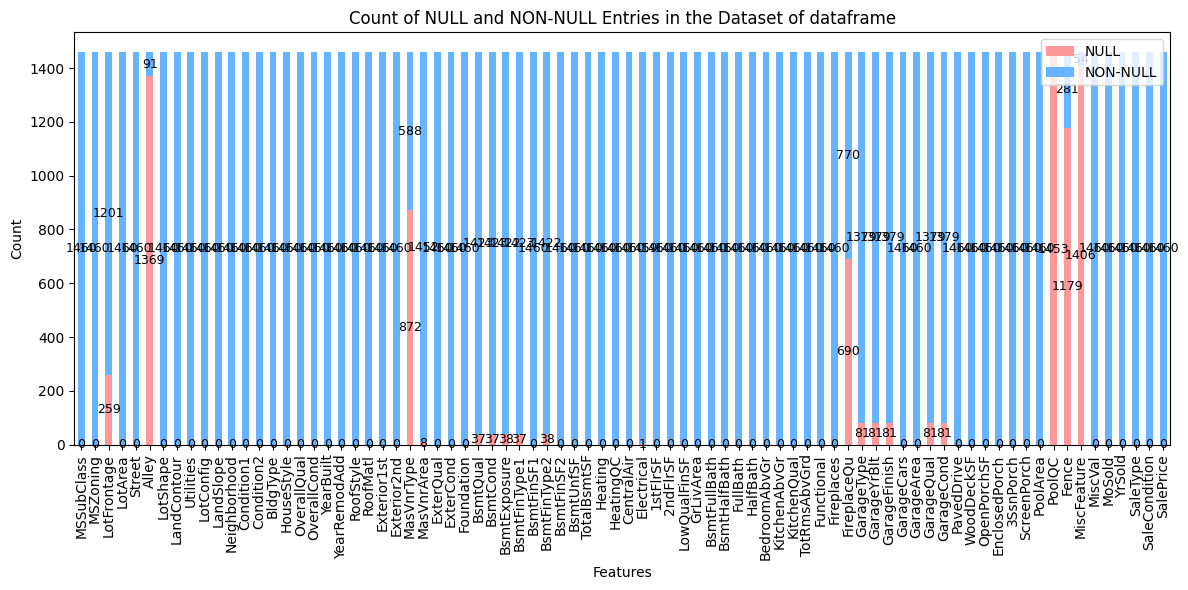

In [15]:
check_null(df, 'dataframe')

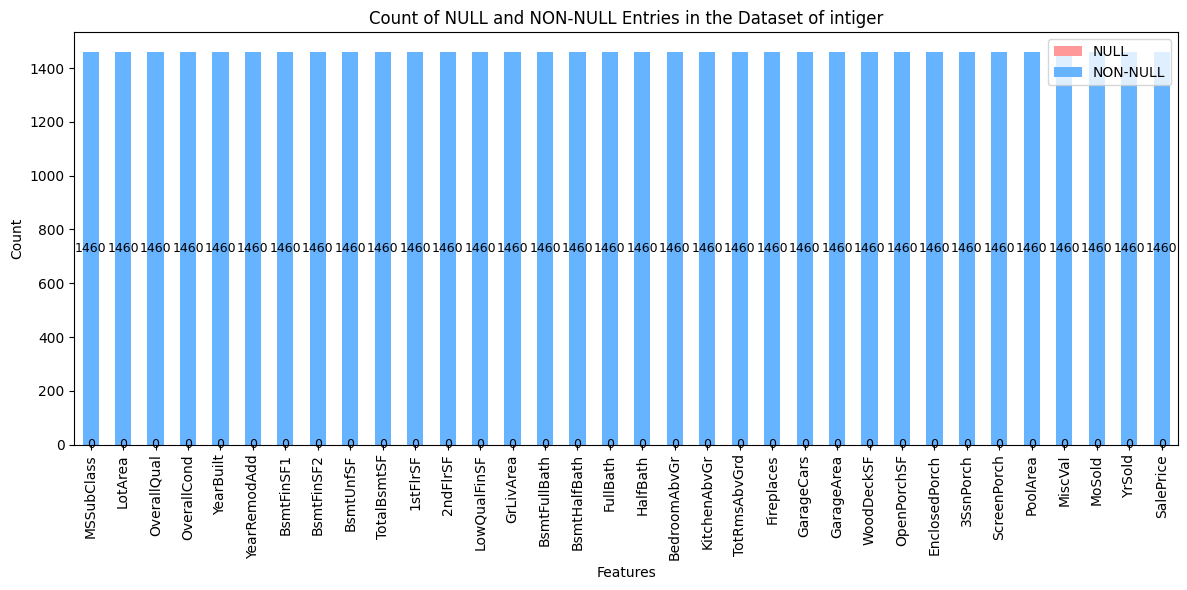

In [16]:
check_null(df[int_columns], 'intiger')

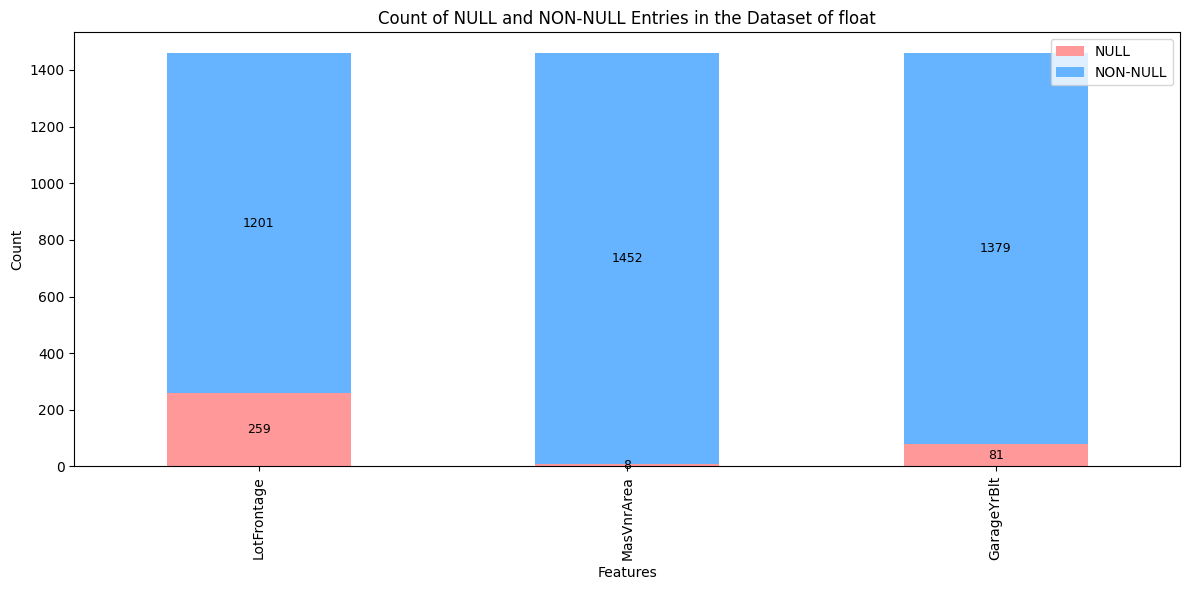

In [17]:
check_null(df[float_columns], 'float')

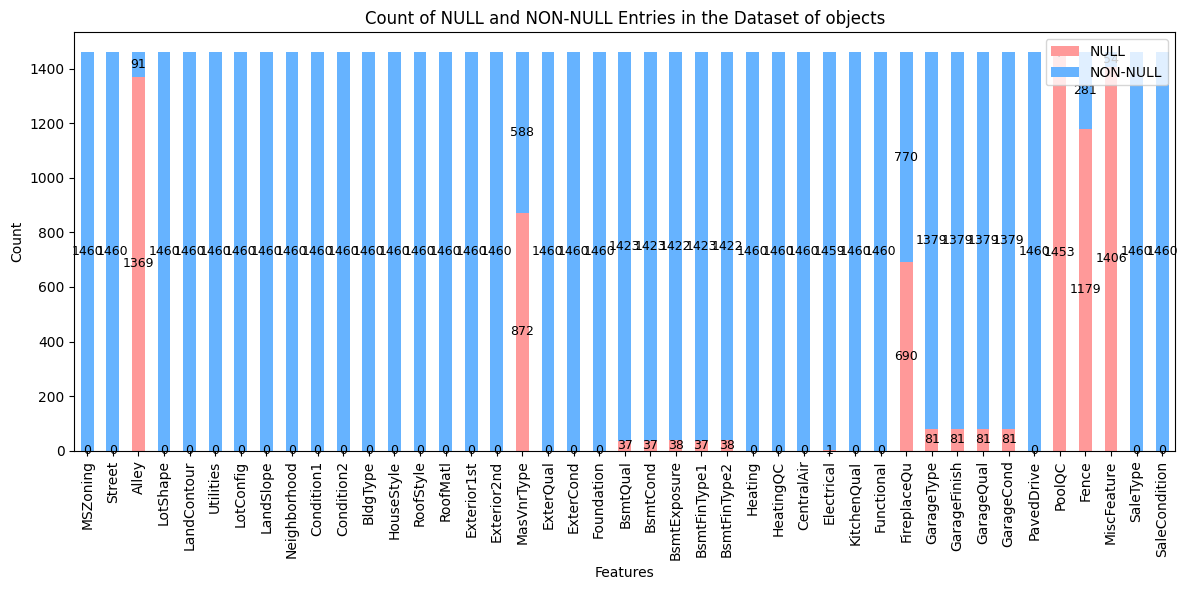

In [18]:
check_null(df[object_columns], 'objects')

In [19]:
### lets remove null and explore the numerical features 

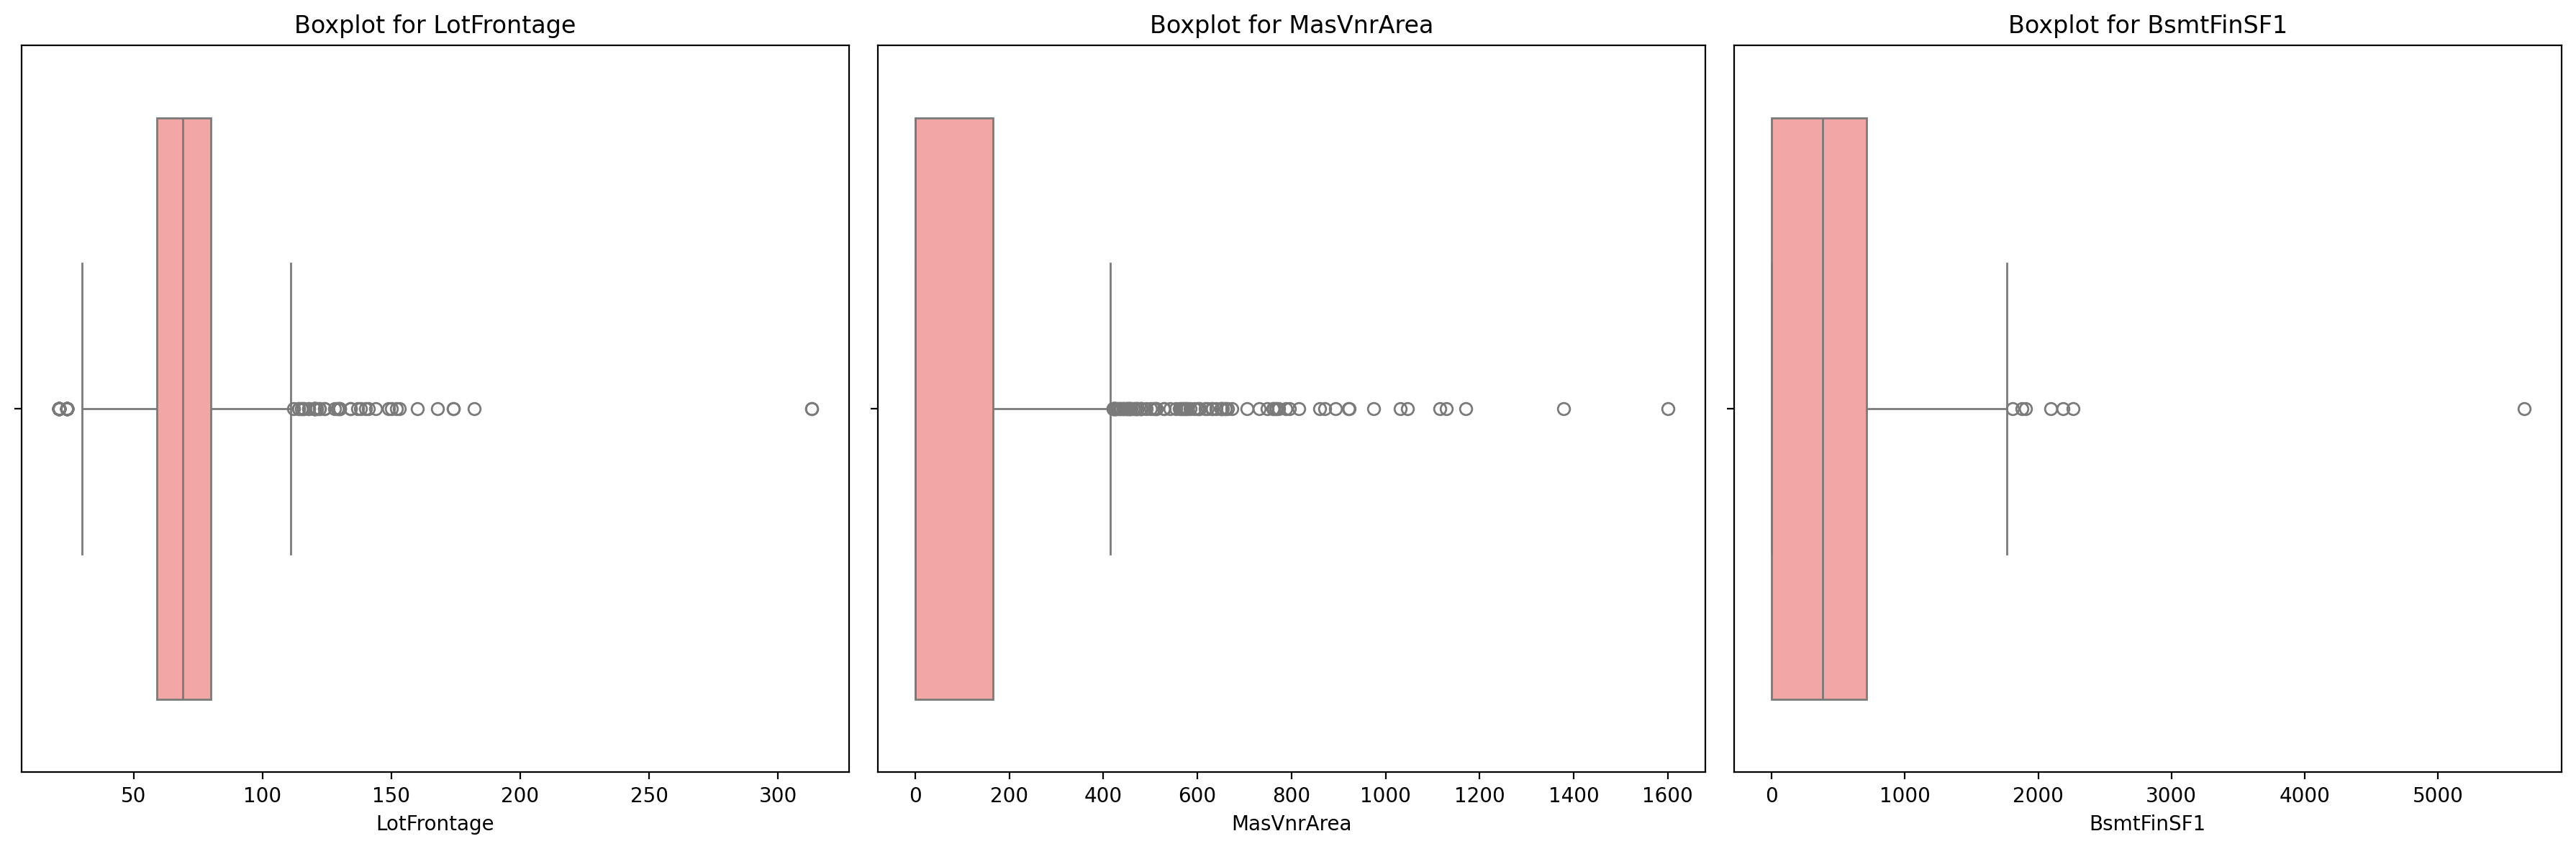

In [20]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi = 200)

# Subplot for LotFrontage
sns.boxplot(x=df['LotFrontage'], ax=axes[0])
axes[0].set_title('Boxplot for LotFrontage')

# Subplot for MasVnrArea
sns.boxplot(x=df['MasVnrArea'], ax=axes[1])
axes[1].set_title('Boxplot for MasVnrArea')

# Subplot for BsmtFinSF1
sns.boxplot(x=df['BsmtFinSF1'], ax=axes[2])
axes[2].set_title('Boxplot for BsmtFinSF1')


plt.tight_layout()


plt.show()

In [21]:
def distribution_plot(df, feature):
    # Set plot style
    # sns.set(style="whitegrid")
    
    # Create the plot
    plt.figure(figsize=(5, 3), dpi=200)
    sns.histplot(df[feature], kde=True, color='teal', edgecolor='black', linewidth=1.5)
    
    # Add titles and labels
    plt.title(f'Distribution of {feature}', fontsize=10,  color='darkblue')
    plt.xlabel(f'Range {feature}', fontsize=10, color='darkgreen')
    plt.ylabel('Frequency', fontsize=10, color='darkgreen')
    
    # Customize grid appearance
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    
    # Add a background color
    plt.gca().set_facecolor('whitesmoke')
    
    # Customize axis ticks
    plt.xticks(fontsize=10, color='darkred')
    plt.yticks(fontsize=10, color='darkred')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [22]:
def info(feature):
    print('Descriptive statistics: ',df[feature].describe())
    print('-------------')
    print('Number of null: ',df[feature].isnull().sum())
    print('-------------')
    print('median', df[feature].median())
    

In [23]:
info('LotFrontage')

Descriptive statistics:  count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
-------------
Number of null:  259
-------------
median 69.0


In [24]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [25]:
info('MasVnrArea')

Descriptive statistics:  count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
-------------
Number of null:  8
-------------
median 0.0


In [26]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [27]:
info('BsmtFinSF1')

Descriptive statistics:  count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
-------------
Number of null:  0
-------------
median 383.5


In [28]:
info('GarageYrBlt')

Descriptive statistics:  count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
-------------
Number of null:  81
-------------
median 1980.0


In [29]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

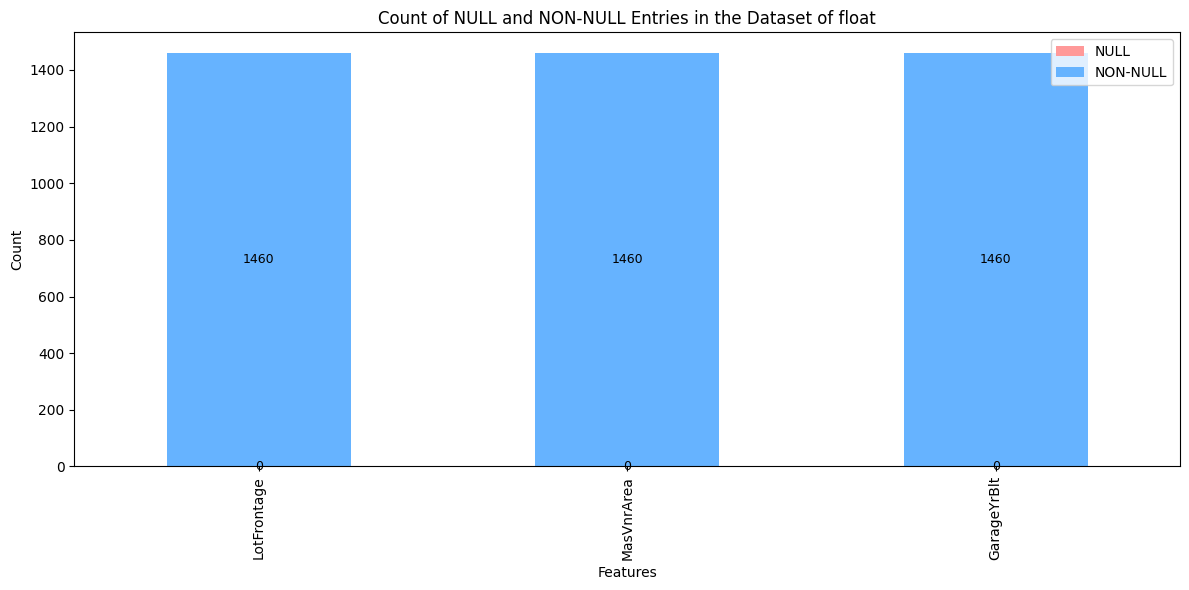

In [30]:
check_null(df[float_columns], 'float')

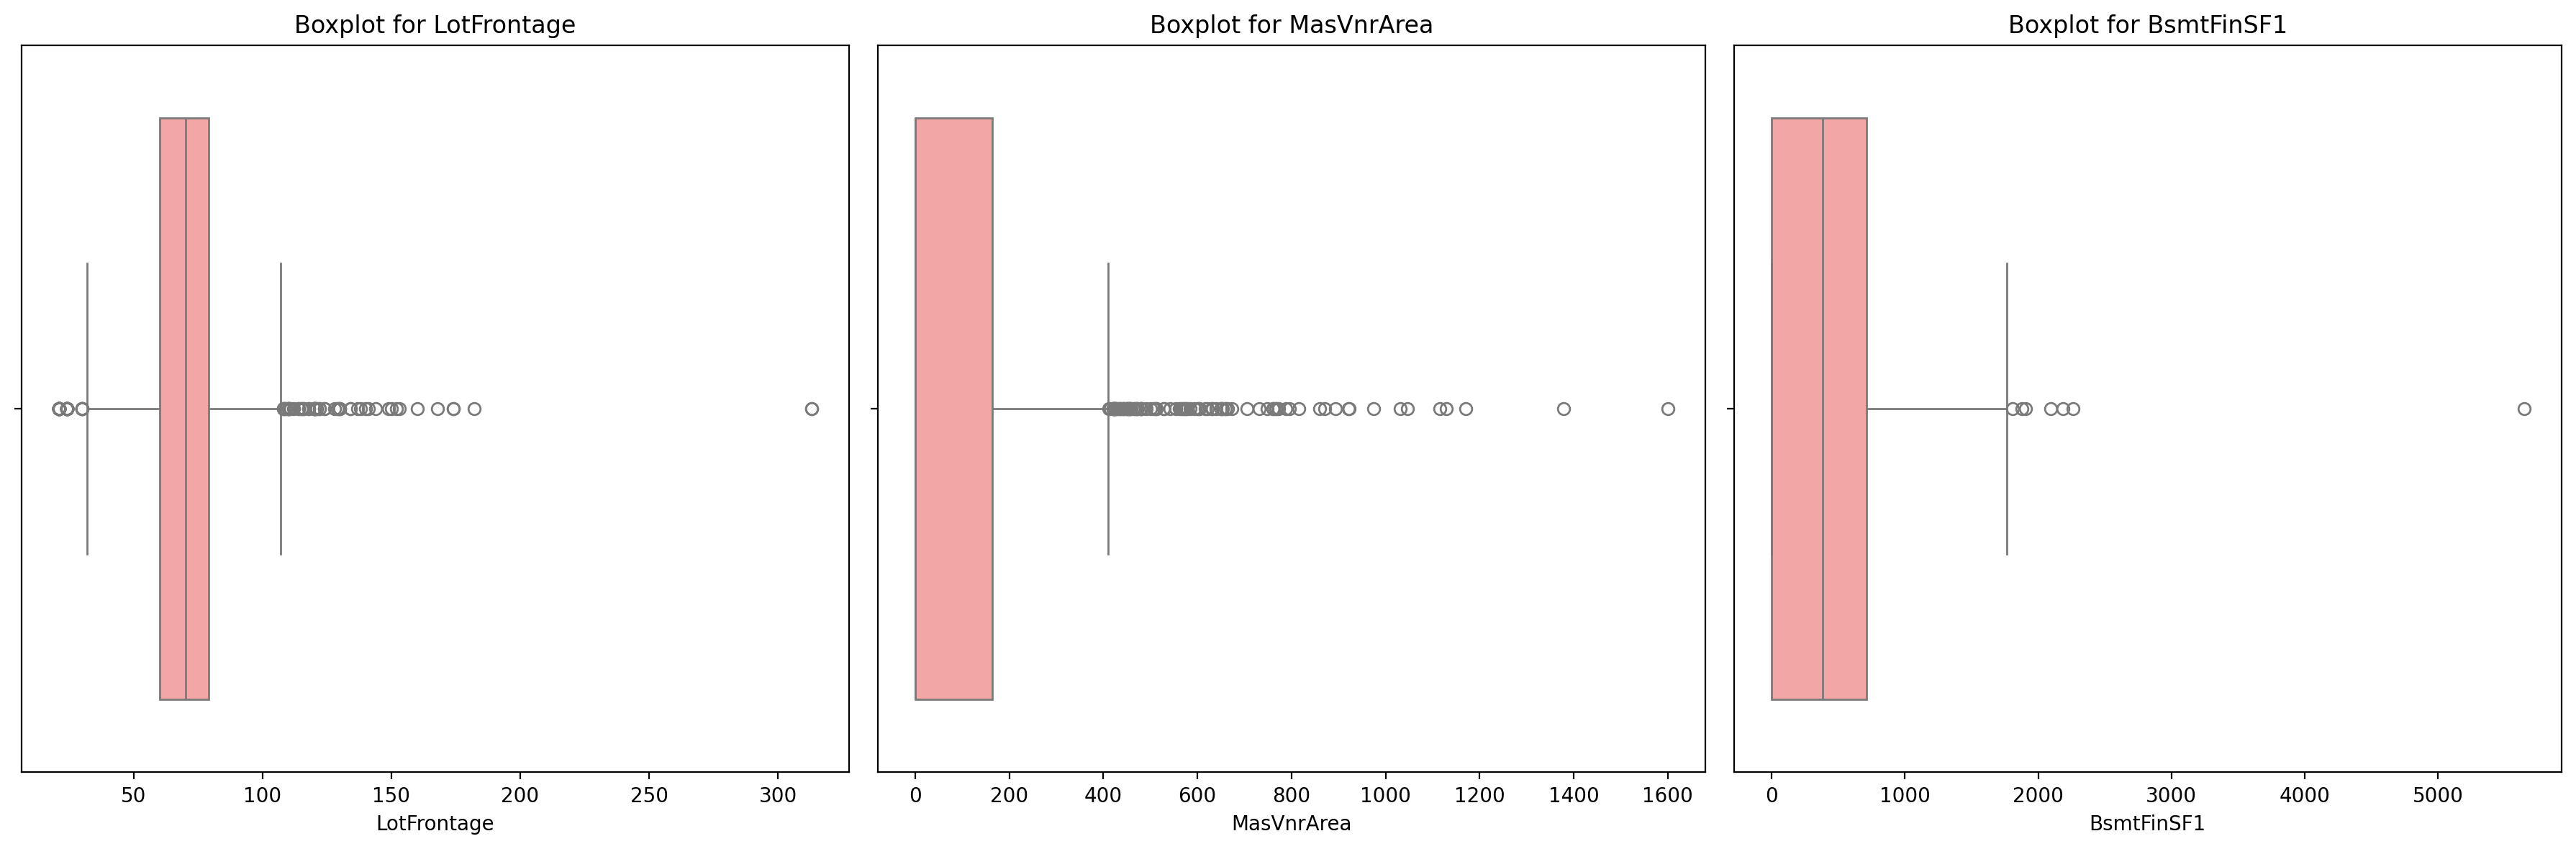

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi = 200)

# Subplot for LotFrontage
sns.boxplot(x=df['LotFrontage'], ax=axes[0])
axes[0].set_title('Boxplot for LotFrontage')

# Subplot for MasVnrArea
sns.boxplot(x=df['MasVnrArea'], ax=axes[1])
axes[1].set_title('Boxplot for MasVnrArea')

# Subplot for BsmtFinSF1
sns.boxplot(x=df['BsmtFinSF1'], ax=axes[2])
axes[2].set_title('Boxplot for BsmtFinSF1')


plt.tight_layout()


plt.show()

In [32]:
# LETS EXPLORE AND REMOVE NULL VALUES AND REPLACE WITH APPROPRATE MEANINGS

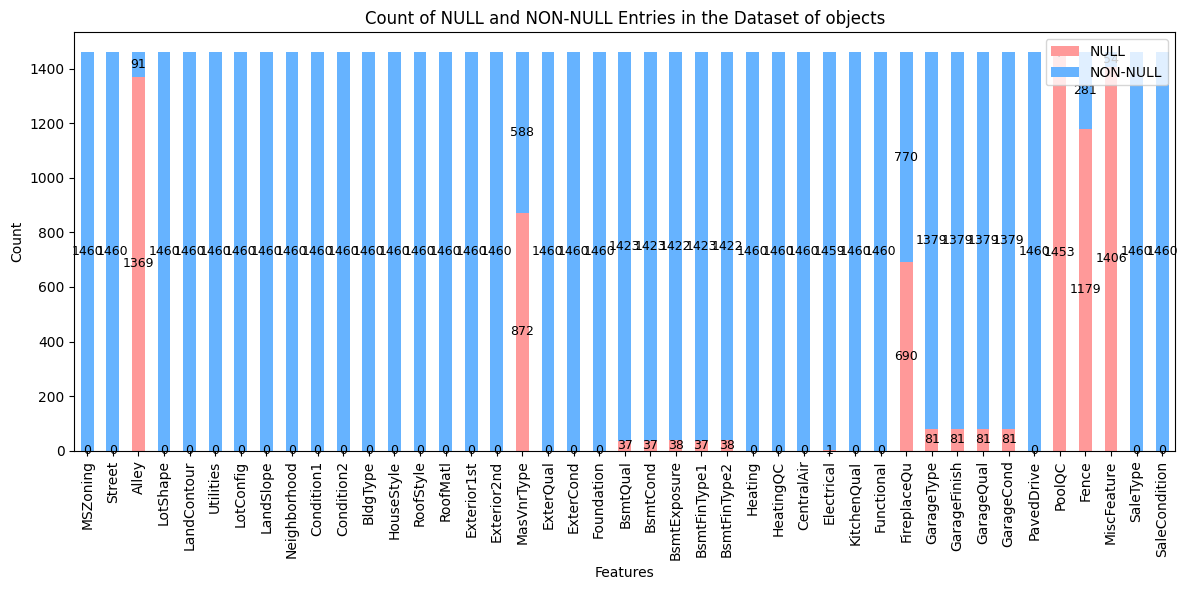

In [33]:
check_null(df[object_columns], 'objects')

In [34]:
df['Alley'].unique()
# Alley: Type of alley access to property

#        Grvl	Gravel
#        Pave	Paved
#        NA 	No alley access

array([nan, 'Grvl', 'Pave'], dtype=object)

In [35]:
# Define the mapping dictionary
dic = { 'Grvl': 'Gravel', 'Pave': 'Paved' }
df['Alley'] = df['Alley'].fillna('No Alley')

# Replace values based on the dictionary
df['Alley'] = df['Alley'].replace(dic)

df['Alley'].unique()

array(['No Alley', 'Gravel', 'Paved'], dtype=object)

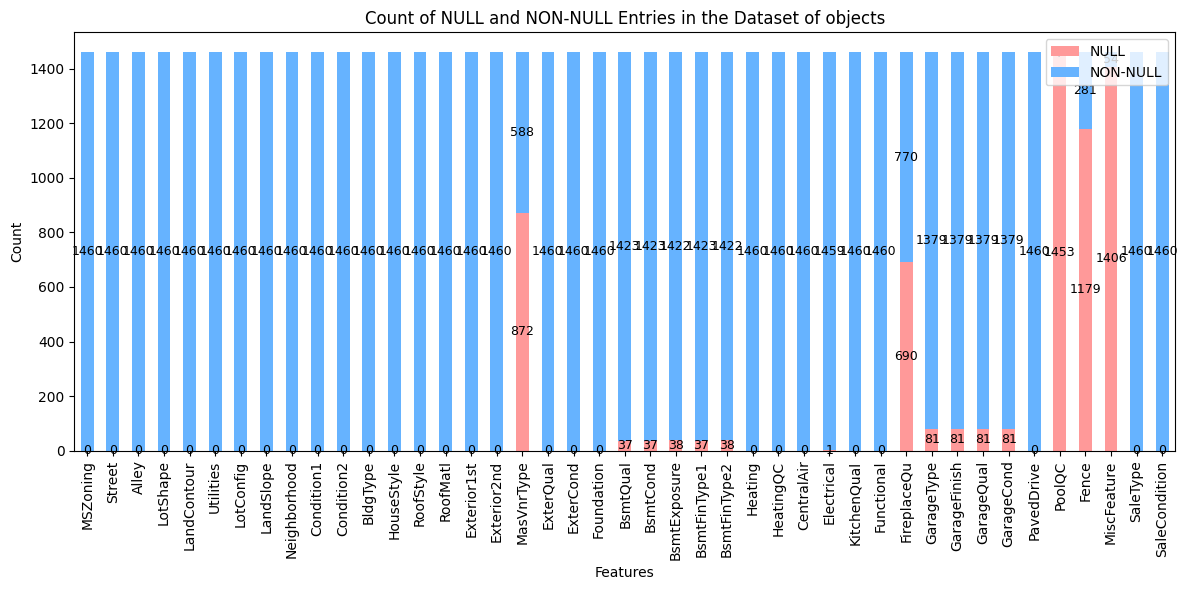

In [36]:
check_null(df[object_columns], 'objects')

In [37]:
df['MasVnrType'].unique()
# MasVnrType: Masonry veneer type

#        BrkCmn	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        None	None
#        Stone	Stone

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [38]:
# Define the mapping dictionary
dic = { 'BrkCmn': 'Brick Common', 'BrkFace': 'Brick Face', 'CBlock':'Cinder Block' }

df['MasVnrType'] = df['MasVnrType'].fillna('None')
# Replace values based on the dictionary
df['MasVnrType'] = df['MasVnrType'].replace(dic)

df['MasVnrType'].unique()

array(['Brick Face', 'None', 'Stone', 'Brick Common'], dtype=object)

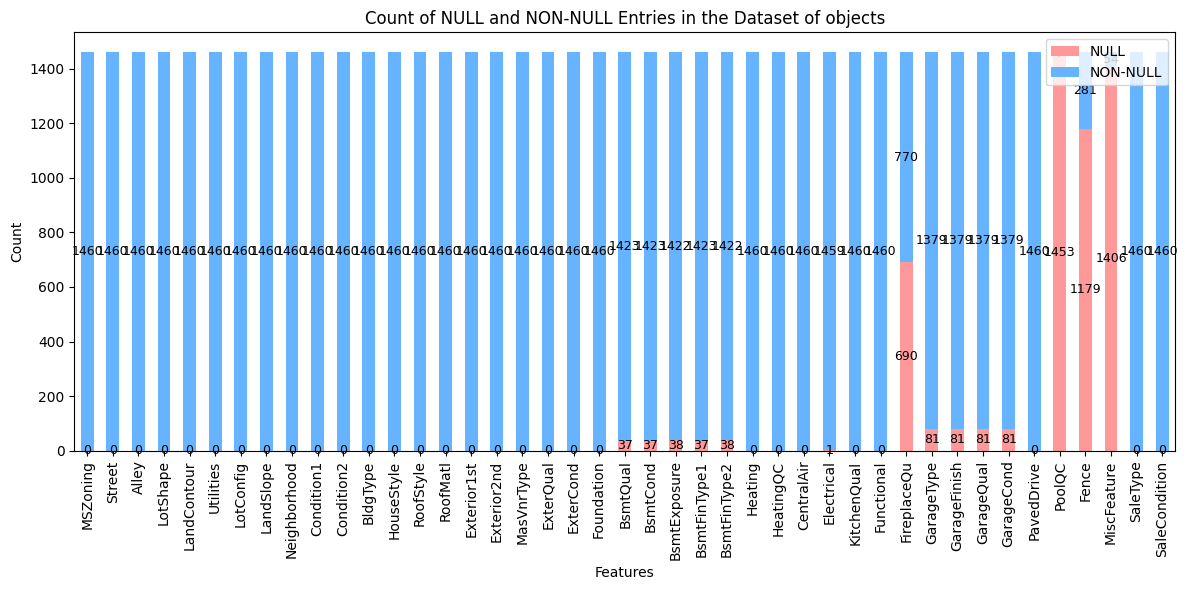

In [39]:
check_null(df[object_columns], 'objects')

In [40]:
df['BsmtQual'].unique()
# BsmtQual: Evaluates the height of the basement

#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
#        NA	No Basement

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [41]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'TA':'Typical', 'Fa':'Fair', 'Po': 'Poor', 'Gd' : 'Good' }
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')

# Replace values based on the dictionary
df['BsmtQual'] = df['BsmtQual'].replace(dic)

df['BsmtQual'].unique()

array(['Good', 'Typical', 'Excellent', 'No Basement', 'Fair'],
      dtype=object)

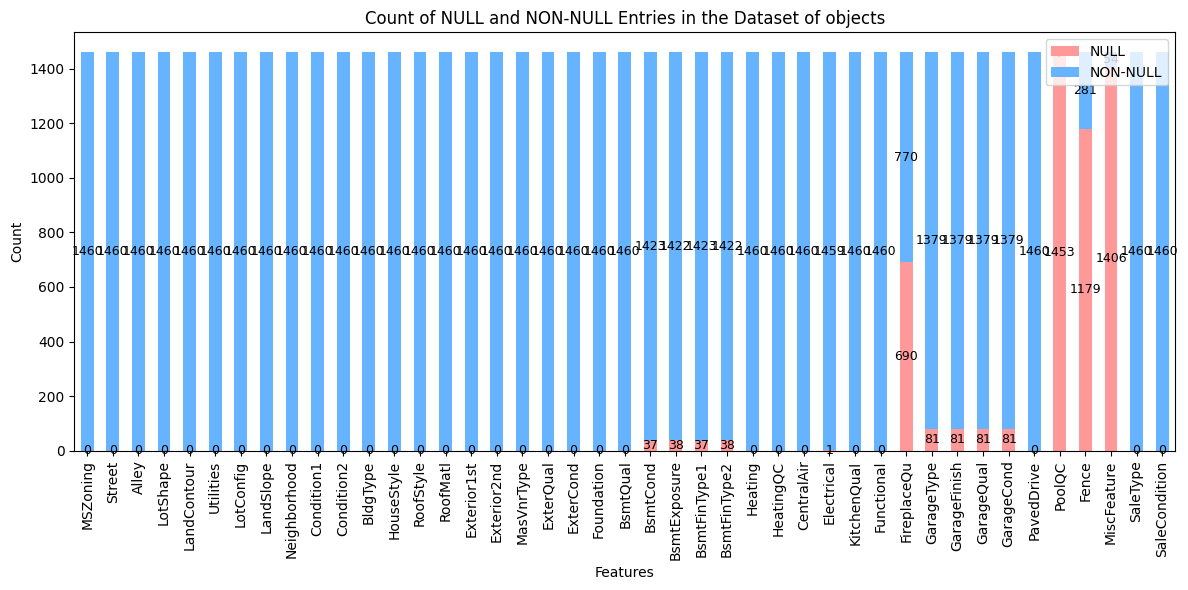

In [42]:
check_null(df[object_columns], 'objects')

In [43]:
df['BsmtCond'].unique()
# BsmtCond: Evaluates the general condition of the basement

#        Ex	Excellent
#        Gd	Good
#        TA	Typical - slight dampness allowed
#        Fa	Fair - dampness or some cracking or settling
#        Po	Poor - Severe cracking, settling, or wetness
#        NA	No Basement

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [44]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'TA':'Typical', 'Fa':'Fair', 'Po': 'Poor', 'Gd' : 'Good' }
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')

# Replace values based on the dictionary
df['BsmtCond'] = df['BsmtCond'].replace(dic)

df['BsmtCond'].unique()

array(['Typical', 'Good', 'No Basement', 'Fair', 'Poor'], dtype=object)

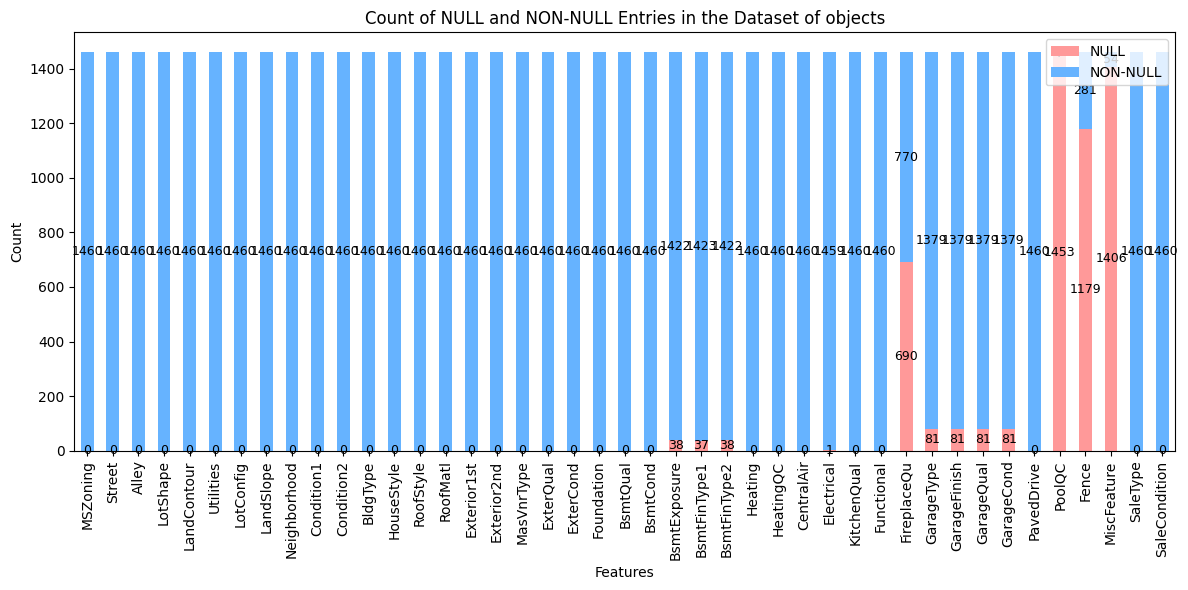

In [45]:
check_null(df[object_columns], 'objects')

In [46]:
df['BsmtExposure'].unique()
# BsmtExposure: Refers to walkout or garden level walls

#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure


array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [47]:
# Define the mapping dictionary
dic = { 'Av': 'Average Exposure', 'Mn':'Mimimum Exposure','Gd' : 'Good Exposure', 'No':'No Exposure' }
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Exposure')

# Replace values based on the dictionary
df['BsmtExposure'] = df['BsmtExposure'].replace(dic)

df['BsmtExposure'].unique()

array(['No Exposure', 'Good Exposure', 'Mimimum Exposure',
       'Average Exposure'], dtype=object)

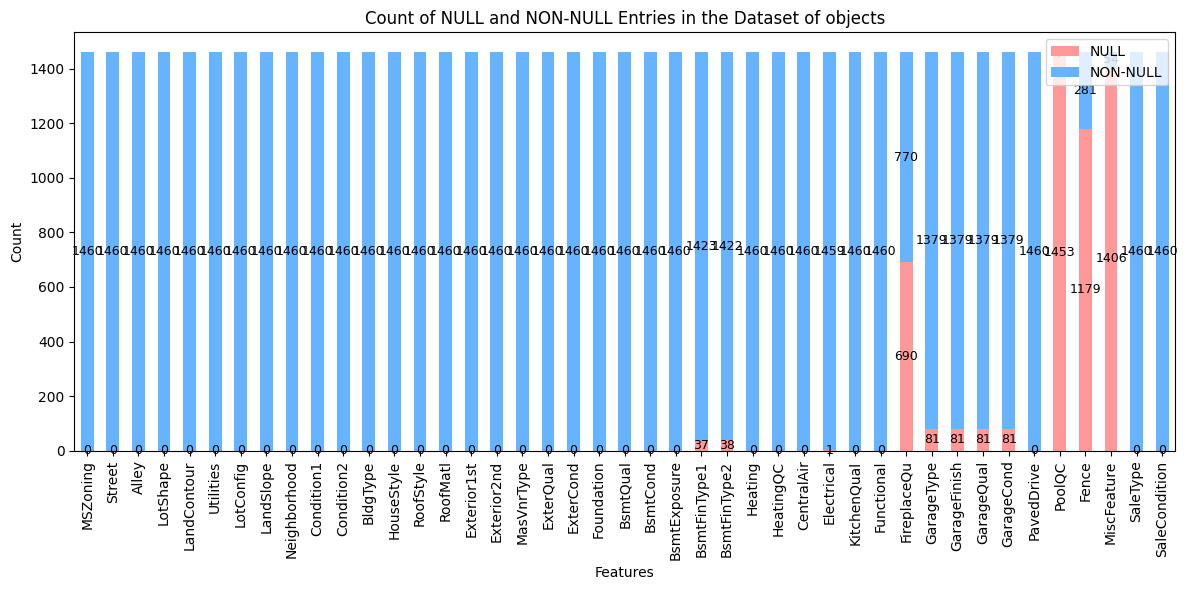

In [48]:
check_null(df[object_columns], 'objects')

In [49]:
df['BsmtFinType1'].unique()
# BsmtFinType1: Rating of basement finished area

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [50]:

# Define the mapping dictionary
dic = { 'GLQ': 'Good Living Quarters', 'ALQ':'Average Living Quarters','BLQ':'Below Average Living Quarters',  'Rec':'Average Rec Room',  'LwQ':'Low Quality', 'Unf':'Unfinshed',}
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')

# Replace values based on the dictionary
df['BsmtFinType1'] = df['BsmtFinType1'].replace(dic)

df['BsmtFinType1'].unique()

array(['Good Living Quarters', 'Average Living Quarters', 'Unfinshed',
       'Average Rec Room', 'Below Average Living Quarters', 'No Basement',
       'Low Quality'], dtype=object)

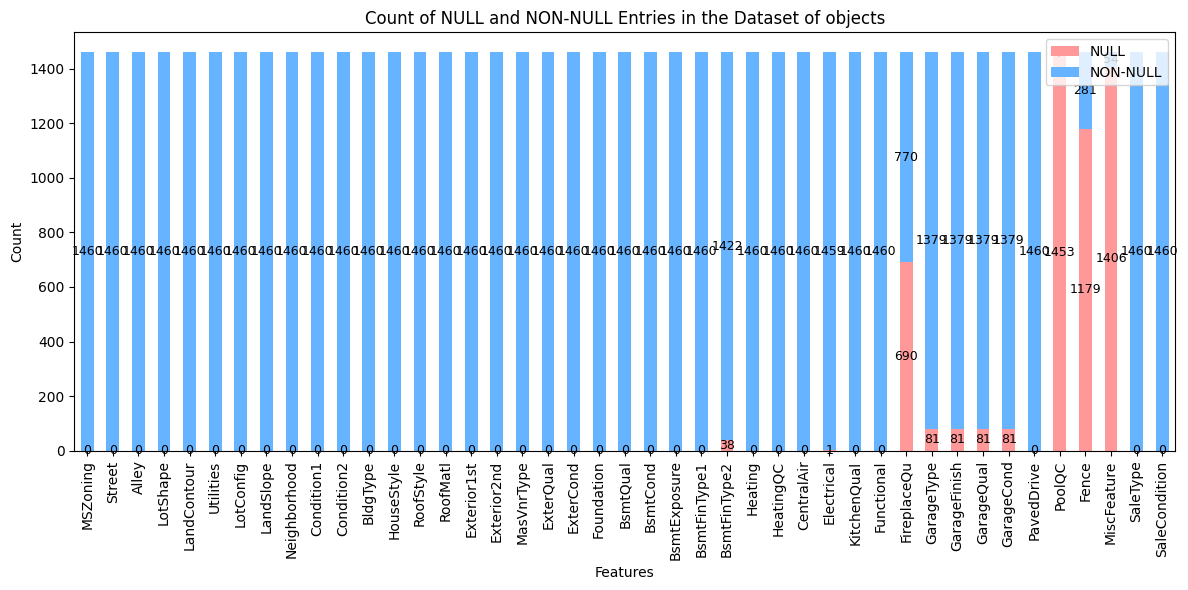

In [51]:
check_null(df[object_columns], 'objects')

In [52]:
df['BsmtFinType2'].unique()
# BsmtFinType2: Rating of basement finished area (if multiple types)

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [53]:
# Define the mapping dictionary
dic = { 'GLQ': 'Good Living Quarters', 'ALQ':'Average Living Quarters','BLQ':'Below Average Living Quarters',  'Rec':'Average Rec Room',  'LwQ':'Low Quality', 'Unf':'Unfinshed',}
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')

# Replace values based on the dictionary
df['BsmtFinType2'] = df['BsmtFinType2'].replace(dic)

df['BsmtFinType2'].unique()

array(['Unfinshed', 'Below Average Living Quarters', 'No Basement',
       'Average Living Quarters', 'Average Rec Room', 'Low Quality',
       'Good Living Quarters'], dtype=object)

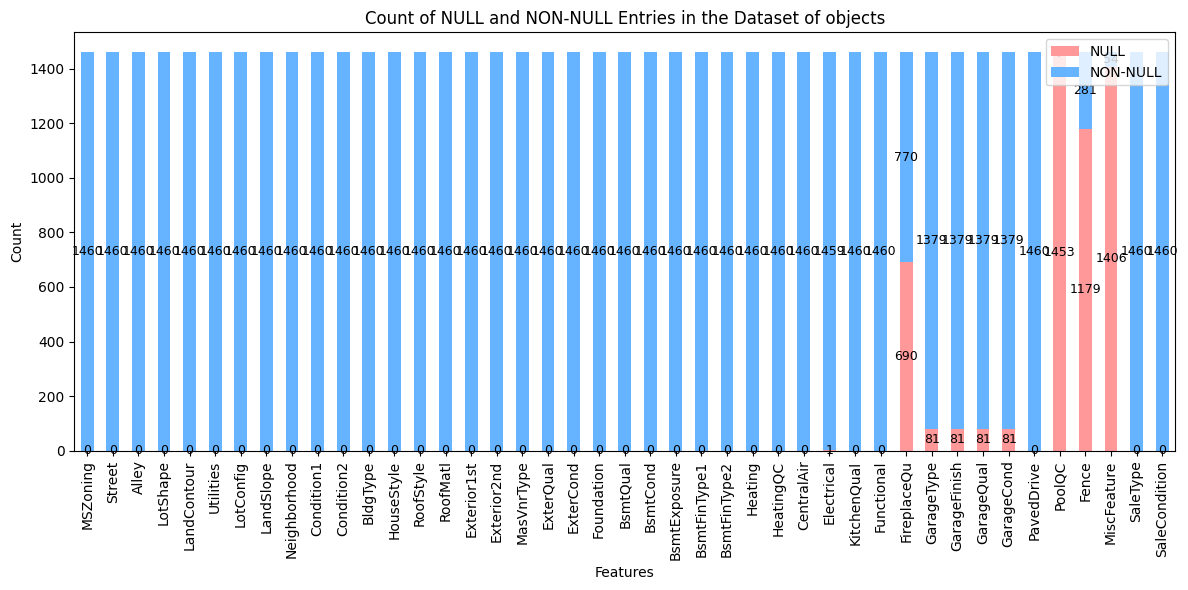

In [54]:
check_null(df[object_columns], 'objects')

In [55]:
df['FireplaceQu'].unique()
# FireplaceQu: Fireplace quality

#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [56]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'Gd':'Good','TA':' Average',  'Fa':'Fair',  'Po':'Poor'}
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

# Replace values based on the dictionary
df['FireplaceQu'] = df['FireplaceQu'].replace(dic)

df['FireplaceQu'].unique()

array(['No Fireplace', ' Average', 'Good', 'Fair', 'Excellent', 'Poor'],
      dtype=object)

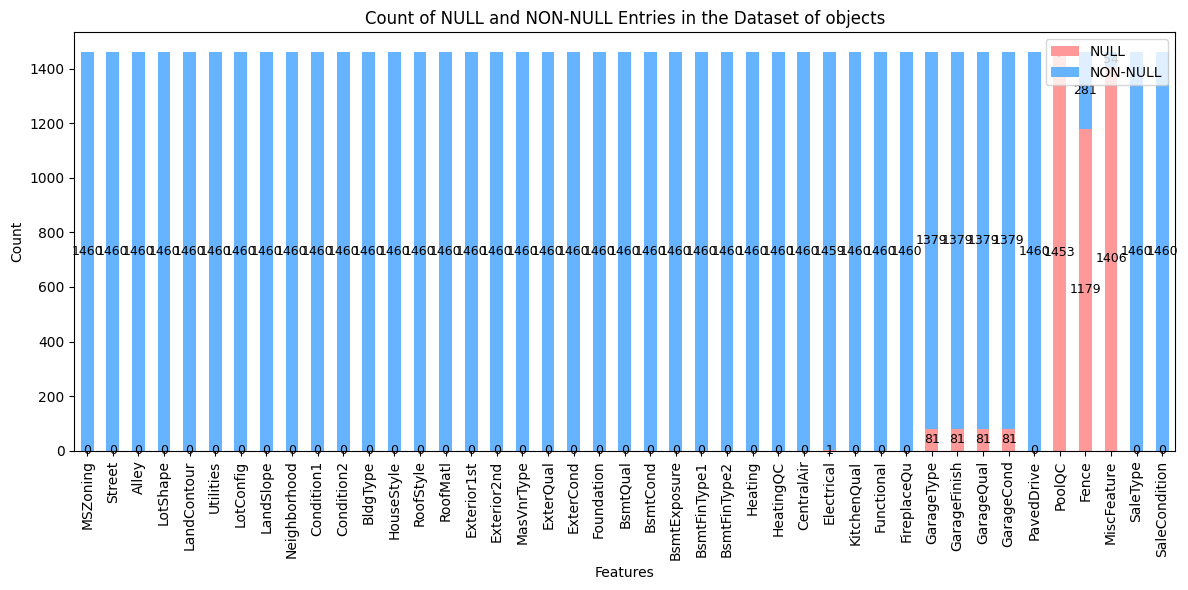

In [57]:
check_null(df[object_columns], 'objects')


In [58]:
df['GarageType'].unique()
# GarageType: Garage location
		
#        2Types	More than one type of garage
#        Attchd	Attached to home
#        Basment	Basement Garage
#        BuiltIn	Built-In (Garage part of house - typically has room above garage)
#        CarPort	Car Port
#        Detchd	Detached from home
#        NA	No Garage

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [59]:
# Define the mapping dictionary
dic = { 'Attchd' :	'Attached to home','Basment': 'Basment Garage', 'BuiltIn':'Built-In',  'CarPort':'Car Port',  'Detchd':'Detached from home'}
df['GarageType'] = df['GarageType'].fillna('No Garage')

# Replace values based on the dictionary
df['GarageType'] = df['GarageType'].replace(dic)

df['GarageType'].unique()

array(['Attached to home', 'Detached from home', 'Built-In', 'Car Port',
       'No Garage', 'Basment Garage', '2Types'], dtype=object)

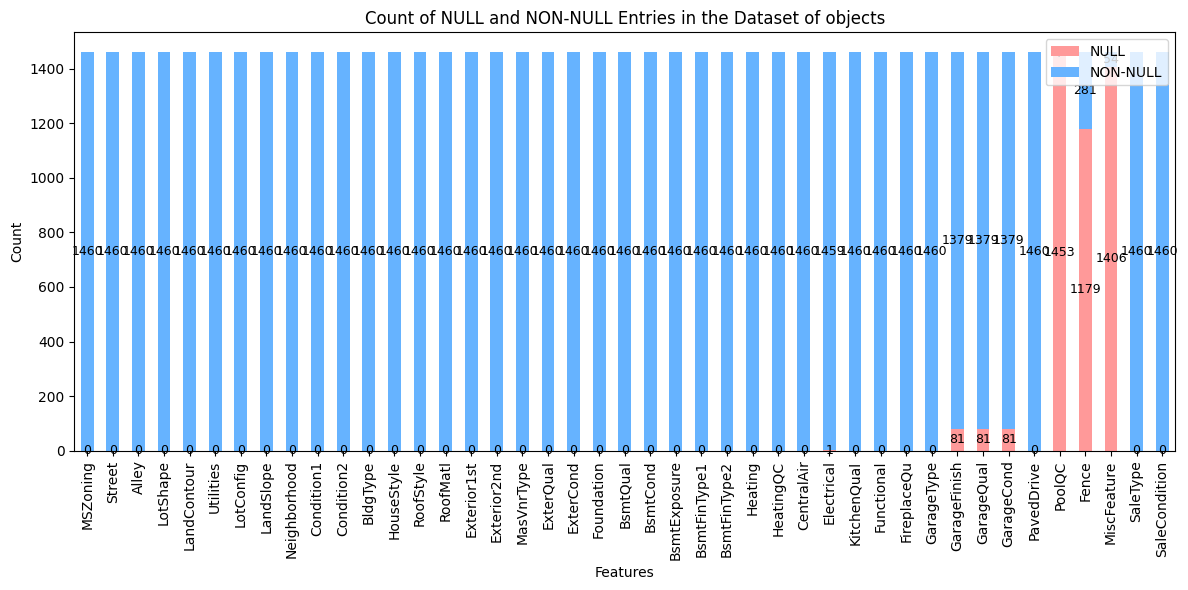

In [60]:
check_null(df[object_columns], 'objects')

In [61]:
df['GarageFinish'].unique()
# GarageFinish: Interior finish of the garage

#        Fin	Finished
#        RFn	Rough Finished	
#        Unf	Unfinished
#        NA	No Garage

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [62]:
# Define the mapping dictionary
dic = { 'Fin' :	'Finished','RFn': 'Rough Finished', 'Unf':'Unfinished'}
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')

# Replace values based on the dictionary
df['GarageFinish'] = df['GarageFinish'].replace(dic)

df['GarageFinish'].unique()

array(['Rough Finished', 'Unfinished', 'Finished', 'No Garage'],
      dtype=object)

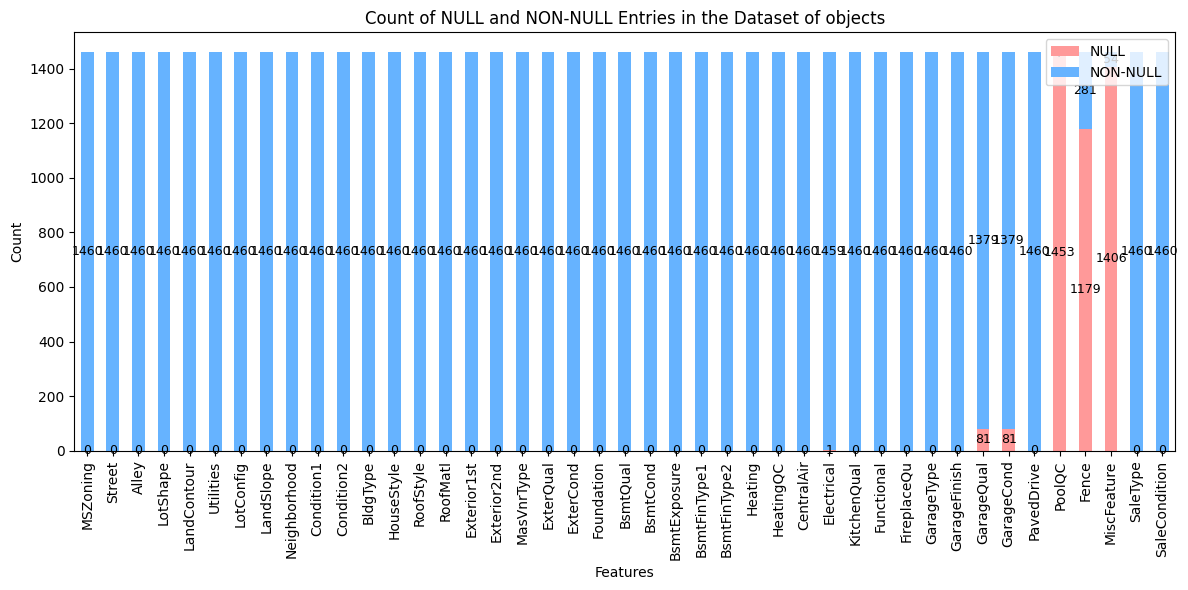

In [63]:
check_null(df[object_columns], 'objects')

In [64]:
df['GarageQual'].unique()
# GarageQual: Garage quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [65]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'Gd':'Good','TA':' Average',  'Fa':'Fair',  'Po':'Poor'}
df['GarageQual'] = df['GarageQual'].fillna('No Garage')

# Replace values based on the dictionary
df['GarageQual'] = df['GarageQual'].replace(dic)

df['GarageQual'].unique()

array([' Average', 'Fair', 'Good', 'No Garage', 'Excellent', 'Poor'],
      dtype=object)

In [66]:
df['GarageCond'].unique()
# GarageCond: Garage condition

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [67]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'Gd':'Good','TA':' Average',  'Fa':'Fair',  'Po':'Poor'}
df['GarageCond'] = df['GarageCond'].fillna('No Garage')

# Replace values based on the dictionary
df['GarageCond'] = df['GarageCond'].replace(dic)

df['GarageCond'].unique()

array([' Average', 'Fair', 'No Garage', 'Good', 'Poor', 'Excellent'],
      dtype=object)

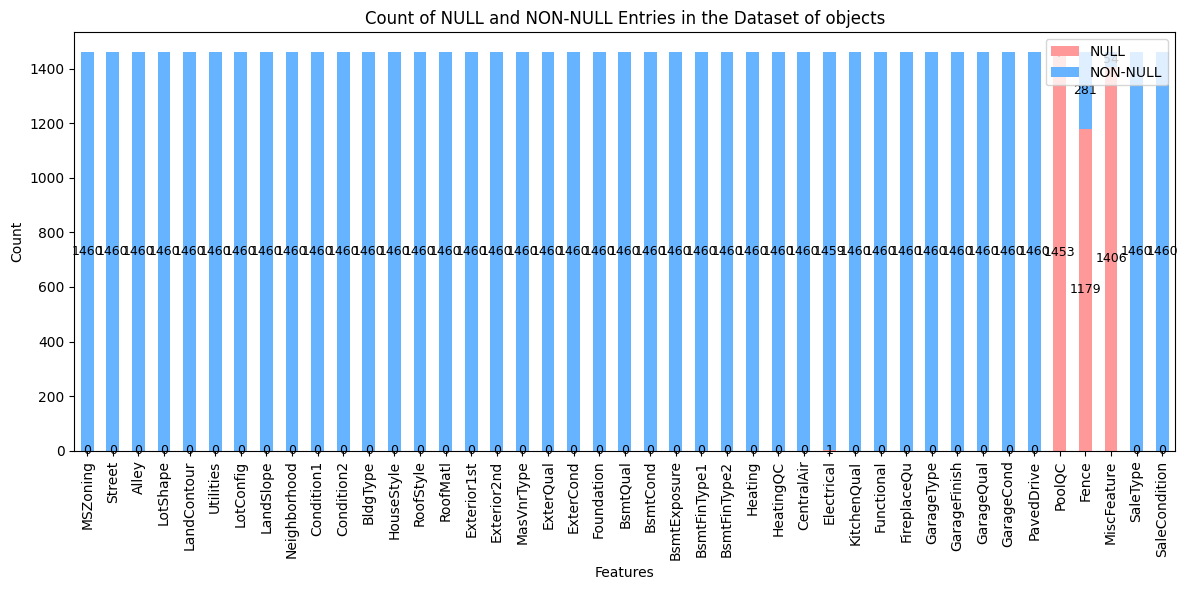

In [68]:
check_null(df[object_columns], 'objects')

In [69]:
df['PoolQC'].unique()
# PoolQC: Pool quality
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        NA	No Pool

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [70]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'Gd':'Good','TA':' Average',  'Fa':'Fair'}
df['PoolQC'] = df['PoolQC'].fillna('No Pool')

# Replace values based on the dictionary
df['PoolQC'] = df['PoolQC'].replace(dic)

df['PoolQC'].unique()

array(['No Pool', 'Excellent', 'Fair', 'Good'], dtype=object)

In [71]:
df['Fence'].unique()
# Fence: Fence quality
		
#        GdPrv	Good Privacy
#        MnPrv	Minimum Privacy
#        GdWo	Good Wood
#        MnWw	Minimum Wood/Wire
#        NA	No Fence

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [72]:
# Define the mapping dictionary
dic = { 'GdPrv': 'Good Privacy', 'MnPrv':'Minimum Privacy','GdWo':' Good Wood',  'MnWw':'Minimum Wood/Wire'}
df['Fence'] = df['Fence'].fillna('No Fence')

# Replace values based on the dictionary
df['Fence'] = df['Fence'].replace(dic)

df['Fence'].unique()

array(['No Fence', 'Minimum Privacy', ' Good Wood', 'Good Privacy',
       'Minimum Wood/Wire'], dtype=object)

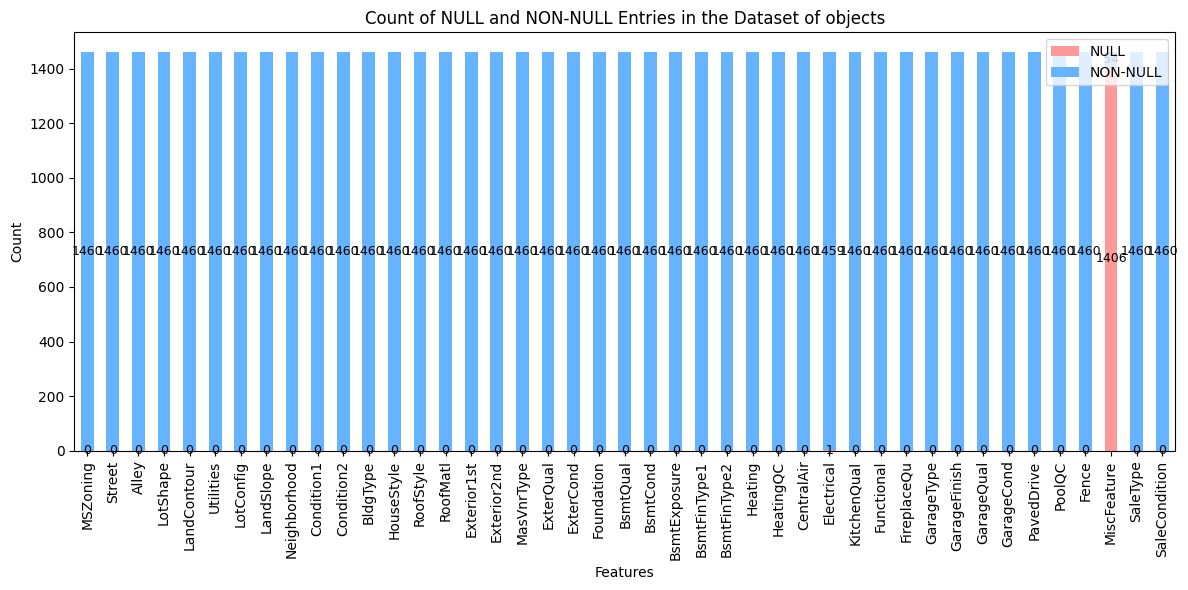

In [73]:
check_null(df[object_columns], 'objects')

In [74]:
df['MiscFeature'].unique()
# MiscFeature: Miscellaneous feature not covered in other categories
		
#        Elev	Elevator
#        Gar2	2nd Garage (if not described in garage section)
#        Othr	Other
#        Shed	Shed (over 100 SF)
#        TenC	Tennis Court
#        NA	None

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [75]:
# Define the mapping dictionary
dic = { 'Elev': 'Elevator', 'Gar2':'2nd Garage','Othr':' Other',  'Shed':'Shed', 'TenC':'Tennis Court'}
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# Replace values based on the dictionary
df['MiscFeature'] = df['MiscFeature'].replace(dic)

df['MiscFeature'].unique()

array(['None', 'Shed', '2nd Garage', ' Other', 'Tennis Court'],
      dtype=object)

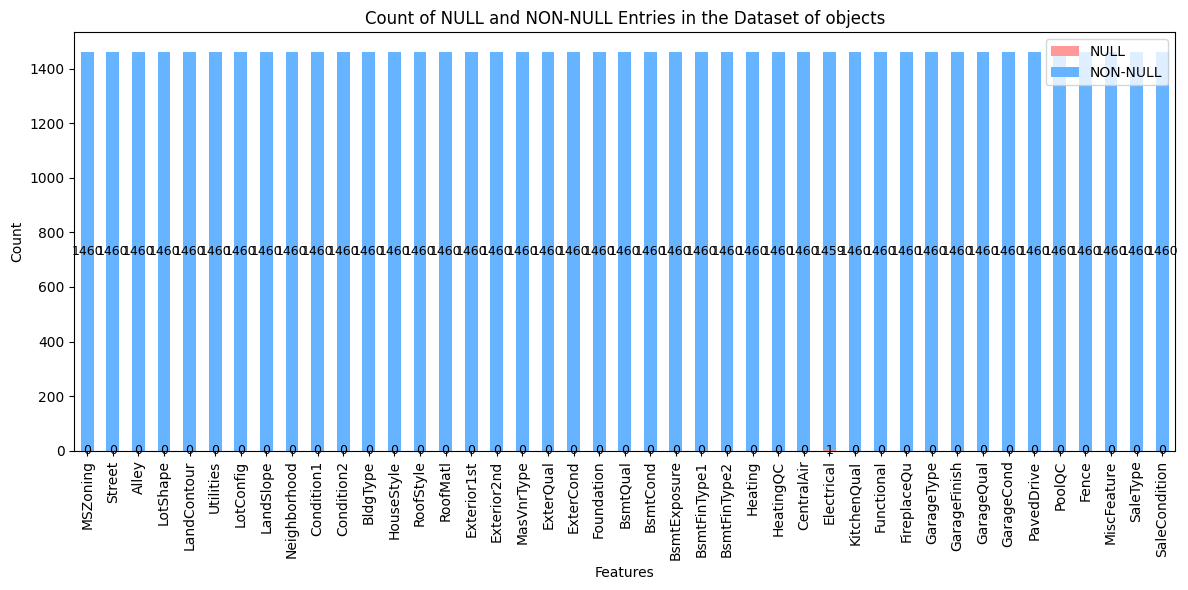

In [76]:
check_null(df[object_columns], 'objects')


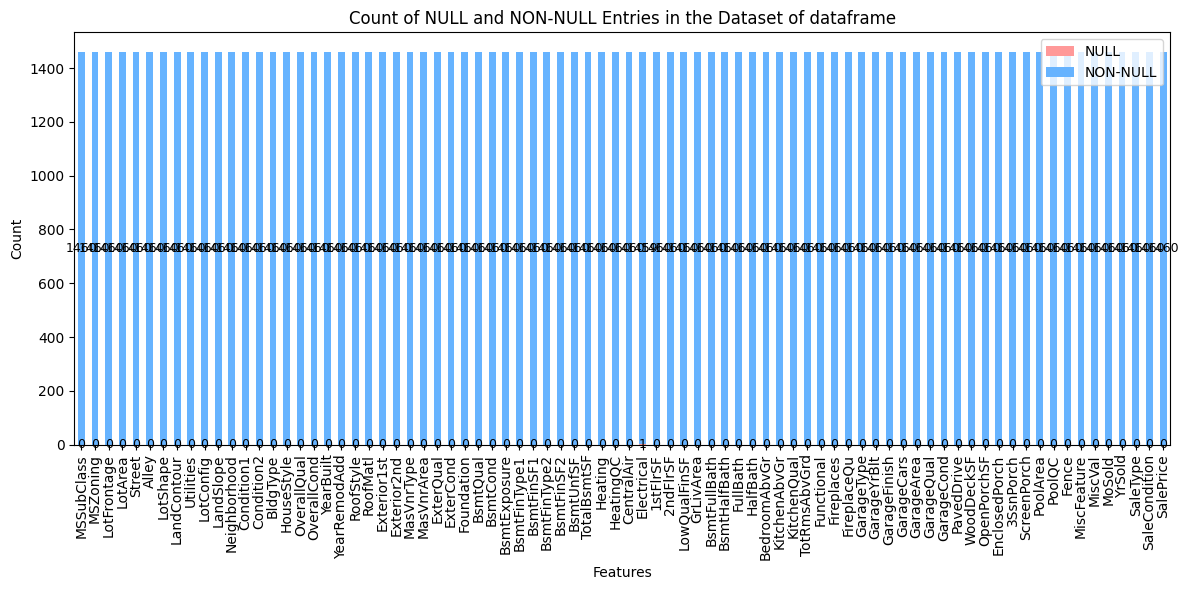

In [77]:
check_null(df, 'dataframe')


In [78]:
df = df.dropna(axis = 0).copy()

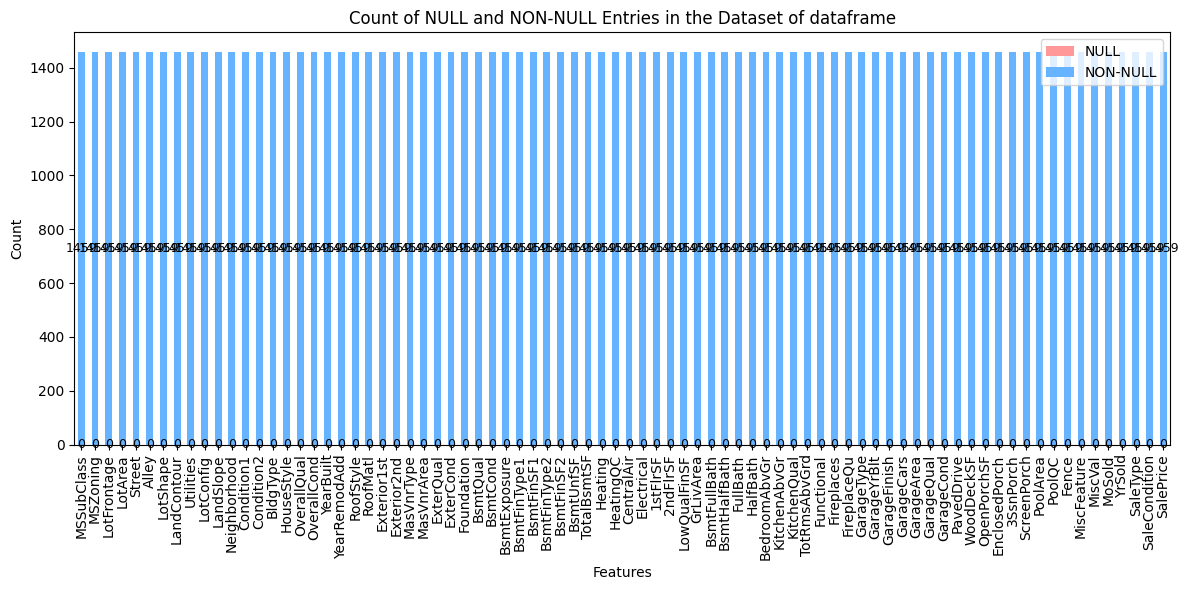

In [79]:
check_null(df, 'dataframe')

In [80]:
df.isnull().sum().sum()

0

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt    

In [82]:
df.shape

(1459, 80)

# 3. section
# Exploratory data analysis

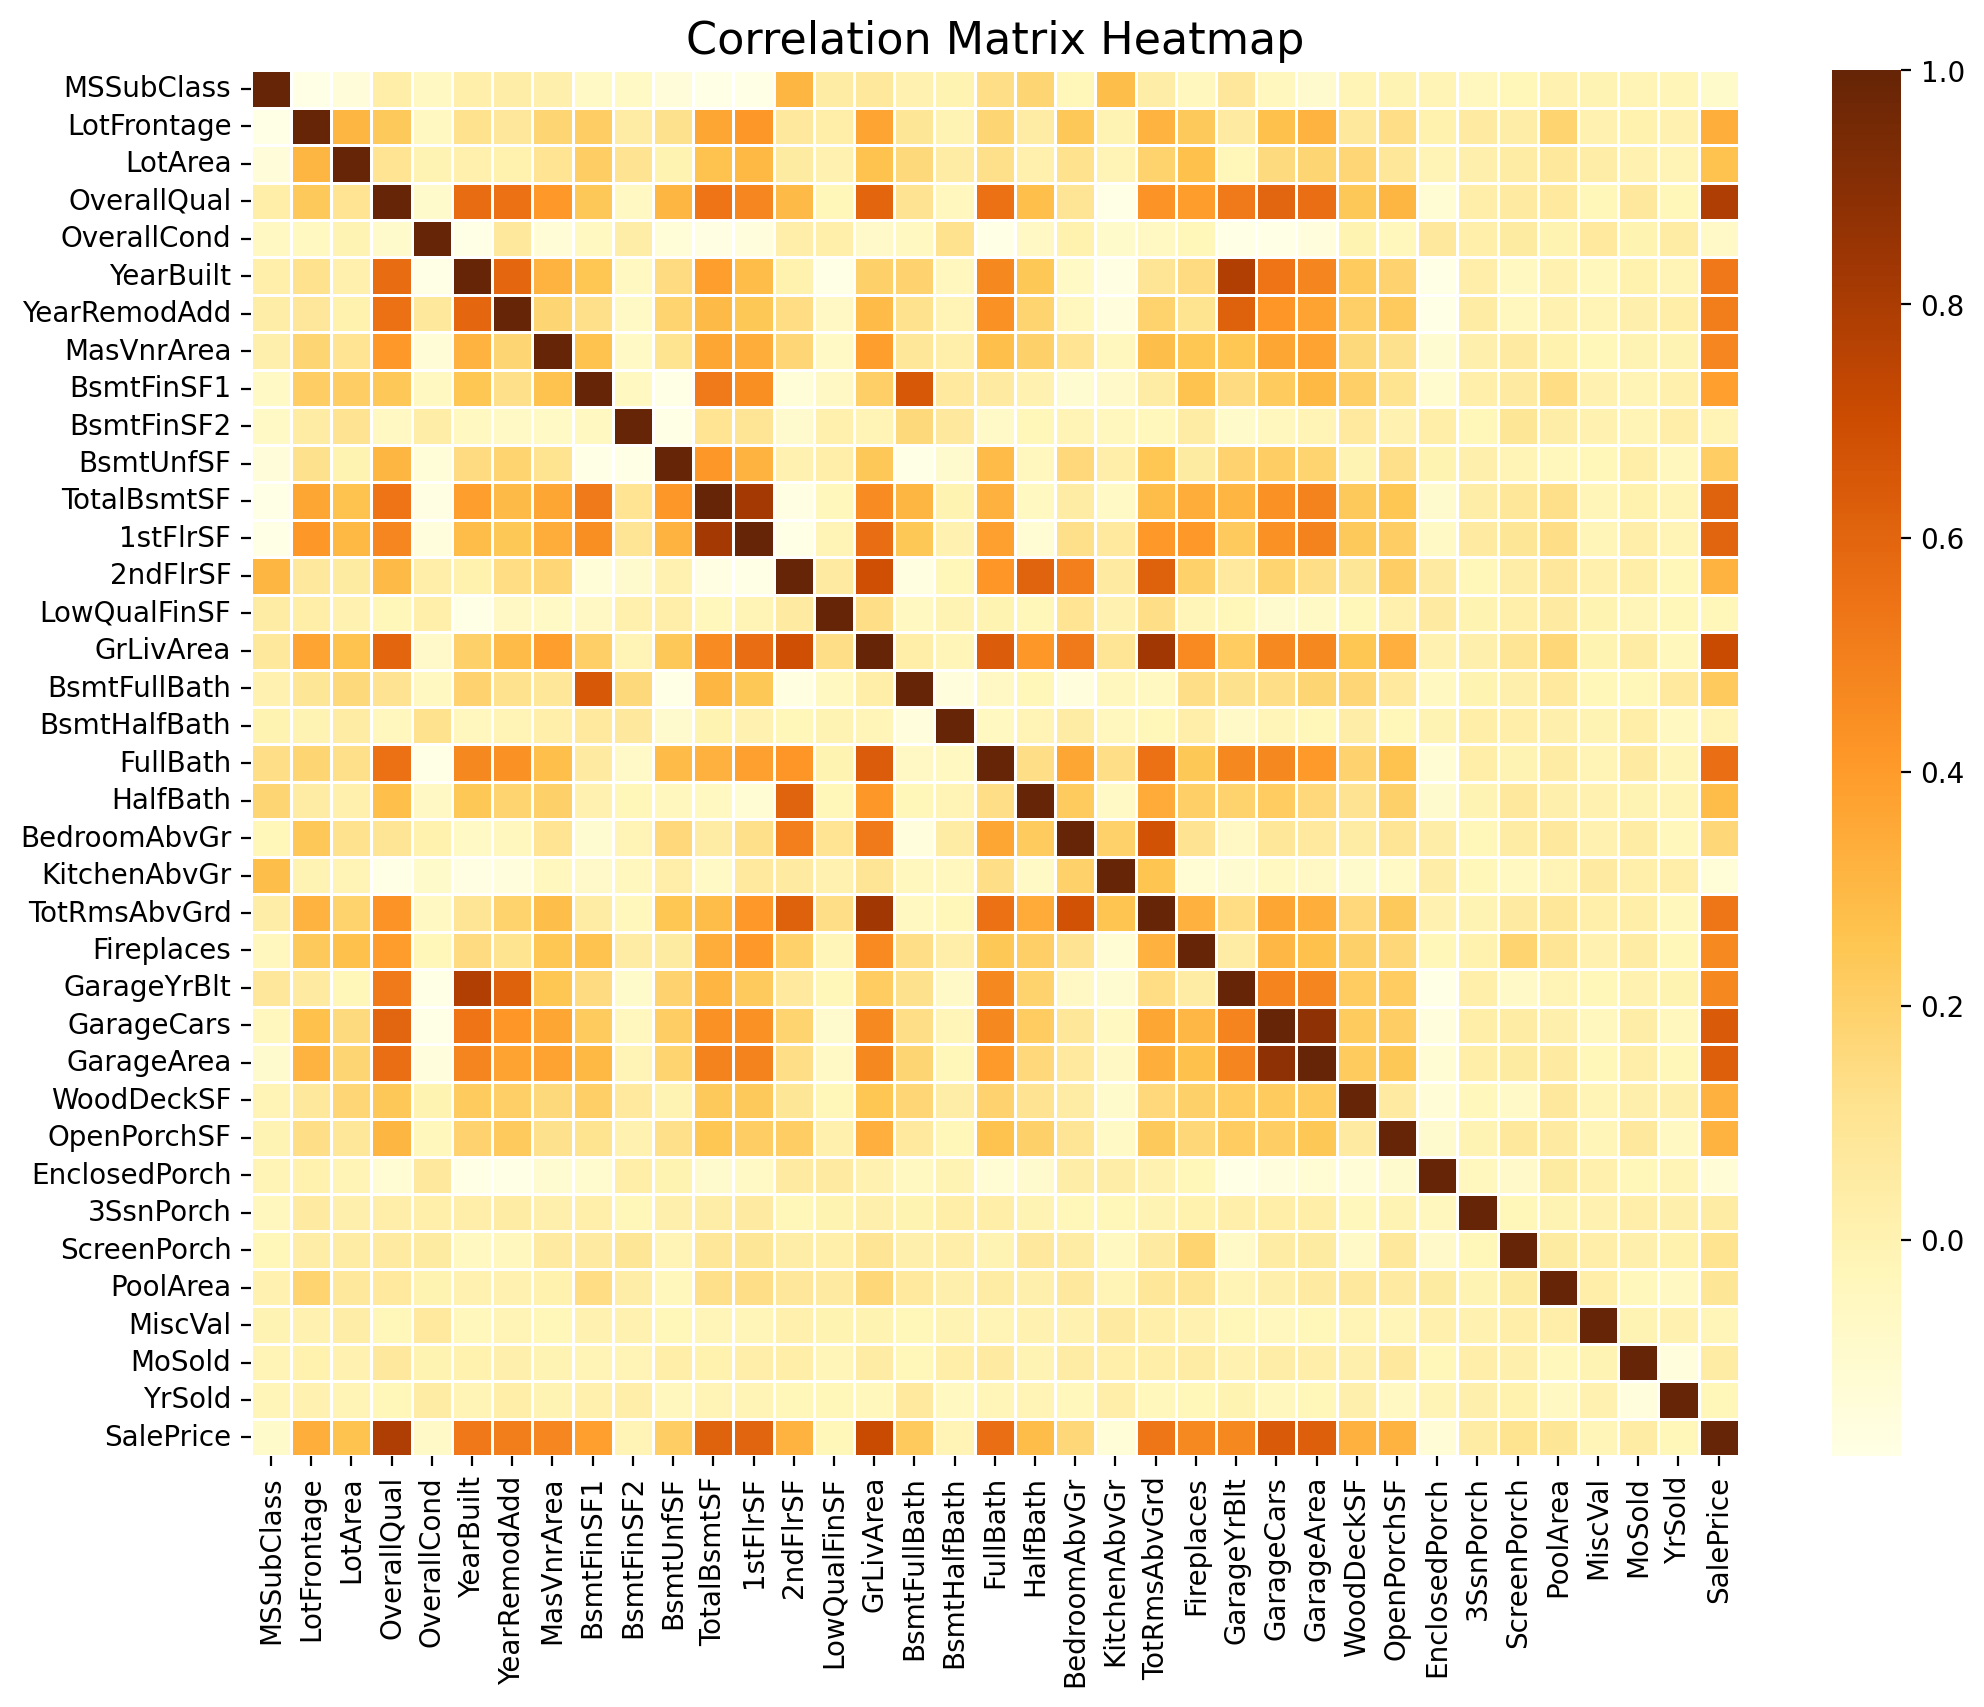

In [83]:
# Set the figure size
plt.figure(figsize=(12, 9), dpi = 200)

heat_df = df.select_dtypes(exclude='object').corr()

# Create a heatmap with annotations and custom color palette
sns.heatmap(heat_df, cmap='YlOrBr', linewidths=0.5, robust = True)

# Set title
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show the plot
plt.show()

In [84]:
df.shape

(1459, 80)

# 4. Section

In [85]:
trn_df = pd.get_dummies(df, drop_first = True)

In [86]:
trn_df.shape

(1459, 259)

In [87]:
df.to_csv('trainning_set.csv', index= False)

In [88]:
# train test split

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the DataFrame into features (X) and target (y)
X = trn_df.drop(['SalePrice'], axis=1)  # Drop the target column to create features
y = trn_df['SalePrice']                   # Target variable

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std = StandardScaler()


X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [90]:
# feature importance with random forest

In [91]:
X_train_std.shape

(1167, 258)

In [92]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Initialize Random Forest Regressor
# regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# # Fit the model with standardized training data
# regressor.fit(X_train_std, y_train)

# # Predict on the test data
# y_pred = regressor.predict(X_test_std)

# y_train_pred = regressor.predict(X_train_std)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')


In [93]:
# # Residuals for training data
# plt.scatter(y_train_pred, y_train_pred - y_train, c='green', marker='o', label='Training data', alpha=0.6)

# # Residuals for test data
# plt.scatter(y_pred, y_pred - y_test, c='red', marker='o', label='Test data', alpha=0.6)

# # Plot formatting
# plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='black', lw=2)
# plt.title('Residuals Plot')
# plt.xlabel('Predicted Values')
# plt.ylabel('Residuals (Predicted - Actual)')
# plt.legend(loc='upper right')
# plt.show()

In [94]:
# # Calculate Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mse)

# print(f'Root Mean Squared Error: {rmse}')

In [95]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Define objective function for Optuna
def objective(trial):
    # Step 2: Define hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)


    # Step 3: Initialize Random Forest with sampled hyperparameters
    regressor = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Step 4: Fit the model and make predictions
    regressor.fit(X_train_std, y_train)
    y_pred = regressor.predict(X_test_std)
    
    # Step 5: Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE directly
    return rmse



In [96]:
# Create study object
study = optuna.create_study(direction="minimize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2024-10-23 16:34:19,594] A new study created in memory with name: no-name-320dde6d-416e-47ee-9877-2b22e968da87


  0%|          | 0/20 [00:00<?, ?it/s]

/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:20,044] Trial 0 finished with value: 25591.782177198176 and parameters: {'n_estimators': 50, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 11}. Best is trial 0 with value: 25591.782177198176.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:20,840] Trial 1 finished with value: 25047.325773955916 and parameters: {'n_estimators': 92, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 6}. Best is trial 1 with value: 25047.325773955916.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:21,533] Trial 2 finished with value: 26859.542517604295 and parameters: {'n_estimators': 115, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 19}. Best is trial 1 with value: 25047.325773955916.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:22,904] Trial 3 finished with value: 25292.984488684044 and parameters: {'n_estimators': 162, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 1 with value: 25047.325773955916.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:23,807] Trial 4 finished with value: 27799.877830552152 and parameters: {'n_estimators': 178, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 15}. Best is trial 1 with value: 25047.325773955916.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:24,689] Trial 5 finished with value: 24993.36207759909 and parameters: {'n_estimators': 118, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 5 with value: 24993.36207759909.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:25,224] Trial 6 finished with value: 29393.4545719818 and parameters: {'n_estimators': 122, 'max_depth': 4, 'min_samples_split': 13, 'min_samples_leaf': 2}. Best is trial 5 with value: 24993.36207759909.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:26,010] Trial 7 finished with value: 26798.420294506523 and parameters: {'n_estimators': 133, 'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 19}. Best is trial 5 with value: 24993.36207759909.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:27,495] Trial 8 finished with value: 24651.660463513592 and parameters: {'n_estimators': 170, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 4}. Best is trial 8 with value: 24651.660463513592.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:27,857] Trial 9 finished with value: 26132.409461890868 and parameters: {'n_estimators': 56, 'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 14}. Best is trial 8 with value: 24651.660463513592.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:29,435] Trial 10 finished with value: 25206.09924415726 and parameters: {'n_estimators': 198, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 8 with value: 24651.660463513592.
[I 2024-10-23 16:34:29,609] Trial 11 finished with value: 24342.140299121726 and parameters: {'n_estimators': 12, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 11 with value: 24342.140299121726.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:29,757] Trial 12 finished with value: 25485.057482096425 and parameters: {'n_estimators': 10, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 11 with value: 24342.140299121726.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:30,360] Trial 13 finished with value: 24517.163108655033 and parameters: {'n_estimators': 71, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 4}. Best is trial 11 with value: 24342.140299121726.
[I 2024-10-23 16:34:30,443] Trial 14 finished with value: 27237.139038452737 and parameters: {'n_estimators': 10, 'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 9}. Best is trial 11 with value: 24342.140299121726.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:30,818] Trial 15 finished with value: 25425.96197837643 and parameters: {'n_estimators': 50, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 9}. Best is trial 11 with value: 24342.140299121726.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:31,599] Trial 16 finished with value: 24403.636187801545 and parameters: {'n_estimators': 82, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 11 with value: 24342.140299121726.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:31,906] Trial 17 finished with value: 24936.43933549264 and parameters: {'n_estimators': 29, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 11 with value: 24342.140299121726.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:32,559] Trial 18 finished with value: 25816.29547617686 and parameters: {'n_estimators': 95, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 12}. Best is trial 11 with value: 24342.140299121726.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-23 16:34:33,214] Trial 19 finished with value: 25387.942149573504 and parameters: {'n_estimators': 85, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 11 with value: 24342.140299121726.


In [97]:


# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)



Best trial: FrozenTrial(number=11, state=1, values=[24342.140299121726], datetime_start=datetime.datetime(2024, 10, 23, 16, 34, 29, 436758), datetime_complete=datetime.datetime(2024, 10, 23, 16, 34, 29, 609702), params={'n_estimators': 12, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=False, low=10, step=1), 'max_depth': IntDistribution(high=20, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=20, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=20, log=False, low=1, step=1)}, trial_id=11, value=None)
Best hyperparameters: {'n_estimators': 12, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [98]:
# Import optuna.visualization
import optuna.visualization as vis

# Plot optimization history
vis.plot_optimization_history(study)

# Plot parameter importance
vis.plot_param_importances(study)

# Plot slice plot
vis.plot_slice(study, params=["n_estimators", "max_depth"])

# Plot contour plot
vis.plot_contour(study, params=["min_samples_split", "min_samples_leaf"])

# Plot parallel_coordinate
vis.plot_parallel_coordinate(study)